# 이미지 벡터화하기

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [5]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


def generate_features(image_paths):
    """
    이미지 경로의 배열을 받아 사전 훈련된 신경망을 사용해 추출한 특성을 반환합니다.
    :param image_paths:
    :return:
    """
    images = np.zeros(shape=(len(image_paths), 224, 224, 3))

    pretrained_vgg16 = VGG16(weights="imagenet", include_top=True)

    # 학습된 특성을 위해 마지막에서 두 번째 층만 사용합니다.
    model = Model(inputs=pretrained_vgg16.input,
                  outputs=pretrained_vgg16.get_layer('fc2').output)

    # 데이터셋을 모두 메모리에 적재
    for i, f in enumerate(image_paths):
        img = image.load_img(f, target_size=(224, 224))
        x_raw = image.img_to_array(img)
        x_expand = np.expand_dims(x_raw, axis=0)
        # i번째 element로 row, column, channel 데이터를 모두 x_expand로 채우는 과정
        images[i, :, :, :] = x_expand

    # 이미지를 모두 적재한 후에 모델에 통과시킵니다
    inputs = preprocess_input(images)
    images_features = model.predict(inputs)
    return images_features

In [23]:
image_paths = [
    "data/dress1.jpg",
    "data/dress2.jpeg",
    "data/boots1.jpeg",
    "data/boots2.jpg",
    "data/shirt1.jpg",
    "data/shirt2.jpg"
]

features = generate_features(image_paths)

for i, image_path in enumerate(image_paths):
    print("Image:", image_path)
    print("Features:", features[i])
    print("------------------------------")

print(features[0].shape)
print(type(features))
print(type(features[0]))

1/1 [==============================] - 1s 714ms/step
Image: data/dress1.jpg
Features: [0.         0.02700838 0.10938323 ... 0.         0.8728332  0.        ]
------------------------------
Image: data/dress2.jpeg
Features: [0.        0.        0.        ... 1.7790148 0.        0.       ]
------------------------------
Image: data/boots1.jpeg
Features: [0.        0.        0.        ... 0.        0.        2.6331744]
------------------------------
Image: data/boots2.jpg
Features: [0.        0.        0.        ... 1.4993833 0.        3.414272 ]
------------------------------
Image: data/shirt1.jpg
Features: [0.        0.        0.        ... 0.        5.3053355 0.       ]
------------------------------
Image: data/shirt2.jpg
Features: [0.        1.5044187 0.        ... 0.        2.2642982 0.       ]
------------------------------
(4096,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


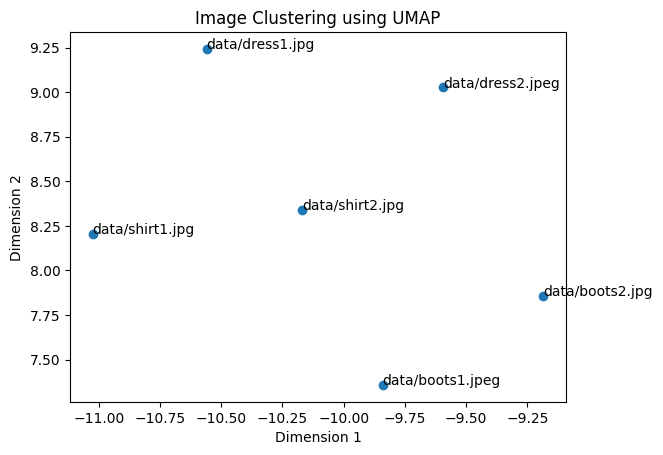

In [24]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

# 차원 축소
embeddings = np.vstack(features)

umap_embedder = umap.UMAP()
umap_emb = umap_embedder.fit_transform(embeddings)

# 시각화
plt.scatter(umap_emb[:, 0], umap_emb[:, 1])
for i, image_path in enumerate(image_paths):
    plt.annotate(image_path, (umap_emb[i, 0], umap_emb[i, 1]))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Image Clustering using UMAP")
plt.show()